In [434]:
## Import Packages
import tensorflow
import warnings
warnings.filterwarnings('ignore')
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.models import load_model
from sklearn.metrics import accuracy_score
import keras
import tempfile
import seaborn as sns
import scipy
from scipy.io import loadmat
import os
import numpy as np
import pandas as pd
## View sample data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.ndimage.filters import correlate, convolve
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
%matplotlib inline
os.chdir('D:\\Data-Science\\digit')

In [7]:
# Read the Image Data
train_data = loadmat('train_32x32.mat')
test_data = loadmat('test_32x32.mat')

In [27]:
## Save the Images in structure form
y_train = keras.utils.to_categorical(train_data['y'][:,0])[:,1:]
y_test = keras.utils.to_categorical(test_data['y'][:,0])[:,1:]

X_train = np.zeros((73257, 32, 32, 3))
for i in range(len(X_train)):
    X_train[i] = train_data['X'].T[i].T.astype('float32')/255

X_test = np.zeros((26032, 32, 32, 3))
for i in range(len(X_test)):
    X_test[i] = test_data['X'].T[i].T.astype('float32')/255

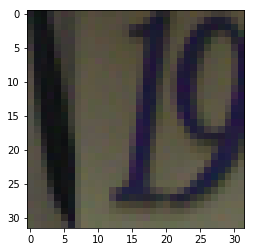

In [537]:
plt.imshow(X_train[y[0]])

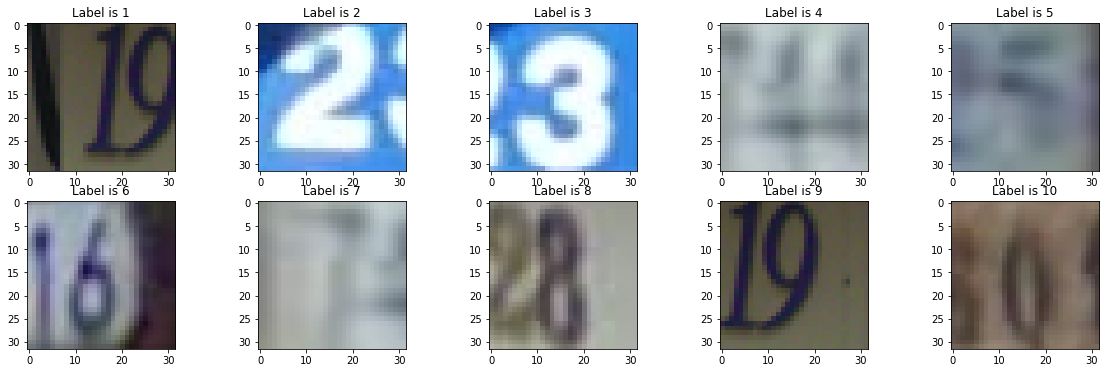

In [540]:
## Visualize the Image with Label
y = train_data['y'][:,0]
y =np.where(y==1)[0][0],np.where(y==2)[0][0],np.where(y==3)[0][0],np.where(y==4)[0][0],np.where(y==5)[0][0],np.where(y==6)[0][0],np.where(y==7)[0][0],np.where(y==8)[0][0],np.where(y==9)[0][0],np.where(y==10)[0][0]

fig = plt.figure(figsize=(20,6))
axes = fig.subplots(nrows=2, ncols=5)

axes[0,0].set_title('Label is {}'.format(1))  ## Label 
axes[0,0].imshow(X_train[y[0]]) ## Image

axes[0,1].set_title('Label is {}'.format(2)) 
axes[0,1].imshow(X_train[y[1]])

axes[0,2].set_title('Label is {}'.format(3)) 
axes[0,2].imshow(X_train[y[2]])

axes[0,3].set_title('Label is {}'.format(4)) 
axes[0,3].imshow(X_train[y[3]])

axes[0,4].set_title('Label is {}'.format(5)) 
axes[0,4].imshow(X_train[y[4]])

axes[1,0].set_title('Label is {}'.format(6)) 
axes[1,0].imshow(X_train[y[5]])

axes[1,1].set_title('Label is {}'.format(7)) 
axes[1,1].imshow(X_train[y[6]])

axes[1,2].set_title('Label is {}'.format(8)) 
axes[1,2].imshow(X_train[y[7]])

axes[1,3].set_title('Label is {}'.format(9)) 
axes[1,3].imshow(X_train[y[8]])

axes[1,4].set_title('Label is {}'.format(10)) 
axes[1,4].imshow(X_train[y[9]])
plt.show()

In [114]:
## Number of Class
np.unique(train_data['y'][:,0])
## There are 10 unique classes

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

#### Base 

In [650]:
# We will use 3 filters,1 drop out with 
# Max pooling of 2,2 pixel i.e. taking the max from 2 col & 2 rows
# 1 layers of weights i.e. Dense Layer

num_classes = 10      # Number of classes to model
cnn = Sequential()    
cnn.add(Conv2D(32, kernel_size=(4, 4),activation='relu',input_shape=(32, 32, 3))) ## First convolutional layer with (4,4) filter 
cnn.add(Conv2D(32, kernel_size = (4,4), activation = 'relu'))
cnn.add(Conv2D(32, kernel_size = (4,4), activation = 'relu'))
cnn.add(Dropout(0.2))
cnn.add(MaxPooling2D(pool_size = (2,2)))
cnn.add(Flatten())
cnn.add(Dense(128, activation = 'relu'))
cnn.add(Dense(num_classes, activation='softmax'))
    
cnn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [651]:
## Train the data using 20 epochs and batch size 128
history_cnn = cnn.fit(X_train, y_train,
                          batch_size=128, epochs=20, verbose=1, validation_split=.1)

scores = cnn.evaluate(X_test, y_test, batch_size = 128, verbose = 0)
print("%s: %.2f%%" % (cnn.metrics_names[1], scores[1]*100))

Train on 65931 samples, validate on 7326 samples
Epoch 1/20
65931/65931 [==============================] - 1532s 23ms/step - loss: 0.9211 - acc: 0.7101 - val_loss: 0.5187 - val_acc: 0.8519
Epoch 2/20
65931/65931 [==============================] - 651s 10ms/step - loss: 0.4397 - acc: 0.8734 - val_loss: 0.4494 - val_acc: 0.8834
Epoch 3/20
65931/65931 [==============================] - 516s 8ms/step - loss: 0.3566 - acc: 0.8951 - val_loss: 0.3744 - val_acc: 0.8912
Epoch 4/20
65931/65931 [==============================] - 380s 6ms/step - loss: 0.3024 - acc: 0.9108 - val_loss: 0.3600 - val_acc: 0.8974
Epoch 5/20
65931/65931 [==============================] - 358s 5ms/step - loss: 0.2601 - acc: 0.9232 - val_loss: 0.3617 - val_acc: 0.8942
Epoch 6/20
65931/65931 [==============================] - 357s 5ms/step - loss: 0.2251 - acc: 0.9328 - val_loss: 0.3514 - val_acc: 0.9019
Epoch 7/20
65931/65931 [==============================] - 375s 6ms/step - loss: 0.1977 - acc: 0.9398 - val_loss: 0.3689 

In [653]:
## Predict the classes given to model, we do not want probabilities for each class.
class_prediction =cnn.predict_classes(X_test,batch_size=128,verbose=True)

26032/26032 [==============================] - 47s 2ms/step


In [655]:
## Add the 1 to the classes because it classes was given from 0 to 9 i.e. 10 classes but we want from 1 to 10. Its python functionality that it start from 0.
Predicted_class_label=class_prediction+1

In [656]:
## Print the Accuracy
y_actual = test_data['y'][:,0]
print('Predicted Accuracy on Test is {}'.format(accuracy_score(y_actual,Predicted_class_label,normalize=True)*100))

Predicted Accuracy on Test is 87.38475722188076


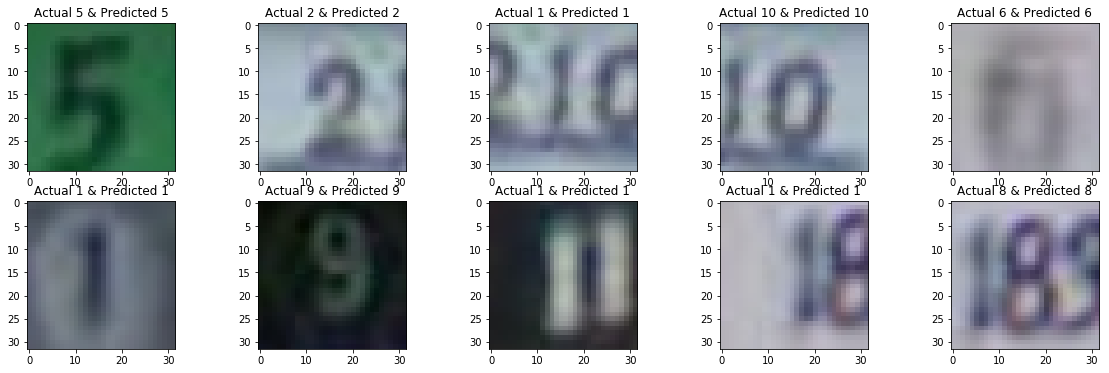

In [657]:
## Visualize the Image with Actual Label and Predicted Label using imshow function from Matplotlib
y = test_data['y'][:,0]

fig = plt.figure(figsize=(20,6))
axes = fig.subplots(nrows=2, ncols=5)

axes[0,0].set_title('Actual {} & Predicted {}'.format(y[0],Predicted_class_label[0]))  ## Label 
axes[0,0].imshow(X_test[0]) ## Image

axes[0,1].set_title('Actual {} & Predicted {}'.format(y[1],Predicted_class_label[1]))
axes[0,1].imshow(X_test[1])

axes[0,2].set_title('Actual {} & Predicted {}'.format(y[2],Predicted_class_label[2]))
axes[0,2].imshow(X_test[2])

axes[0,3].set_title('Actual {} & Predicted {}'.format(y[3],Predicted_class_label[3]))
axes[0,3].imshow(X_test[3])

axes[0,4].set_title('Actual {} & Predicted {}'.format(y[4],Predicted_class_label[4]))
axes[0,4].imshow(X_test[4])

axes[1,0].set_title('Actual {} & Predicted {}'.format(y[5],Predicted_class_label[5]))
axes[1,0].imshow(X_test[5])

axes[1,1].set_title('Actual {} & Predicted {}'.format(y[6],Predicted_class_label[6]))
axes[1,1].imshow(X_test[6])

axes[1,2].set_title('Actual {} & Predicted {}'.format(y[7],Predicted_class_label[7]))
axes[1,2].imshow(X_test[7])

axes[1,3].set_title('Actual {} & Predicted {}'.format(y[8],Predicted_class_label[8]))
axes[1,3].imshow(X_test[8])

axes[1,4].set_title('Actual {} & Predicted {}'.format(y[9],Predicted_class_label[9]))
axes[1,4].imshow(X_test[9])
plt.show()

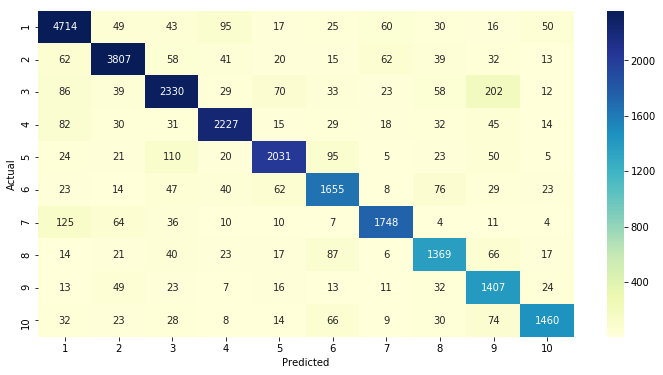

In [658]:
## Visualize the confusion matrix so that we can identify which class was misclassified in which classes minimum or maximum times

plt.figure(figsize = (12,6))
sns.heatmap(pd.crosstab(y,Predicted_class_label,rownames=['Actual'],colnames=['Predicted']), annot=True,  fmt="d",cmap="YlGnBu",robust =True)
plt.show()

## As you see 7 number misclassified in 1, 8 in 6, 3 in 9 &5 etc.

##### Using Batch Normalization

In [437]:
# We will use 3 filters,3 drop out with 
# Batch Normalization to normalize the pixels in each filter so that model each of itself more independently of other layers 
# Max pooling of 2,2 pixel i.e. taking the max from 2 col & 2 rows
# 3 layers of weights i.e. Dense Layer

num_classes = 10      # Number of classes to model
cnn = Sequential()    
cnn.add(Conv2D(32, kernel_size=(4, 4),activation='relu',input_shape=(32, 32, 3))) ## First convolutional layer with (4,4) filter 
cnn.add(Dropout(0.2))         ## Dropout of 0.2
cnn.add(BatchNormalization())
cnn.add(Conv2D(32, kernel_size = (4,4), activation = 'relu'))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(32, kernel_size = (4,4), activation = 'relu'))
cnn.add(Dropout(0.2))
cnn.add(BatchNormalization(axis = 3))
cnn.add(MaxPooling2D(pool_size = (2,2)))
cnn.add(Flatten())
cnn.add(Dense(128, activation = 'relu'))
cnn.add(Dense(128, activation = 'relu'))
cnn.add(Dense(num_classes, activation='softmax'))
    
cnn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])


In [438]:
## Train the data using 20 epochs and batch size 128
history_cnn = cnn.fit(X_train, y_train,
                          batch_size=128, epochs=20, verbose=1, validation_split=.1)

scores = cnn.evaluate(X_test, y_test, batch_size = 128, verbose = 0)
print("%s: %.2f%%" % (cnn.metrics_names[1], scores[1]*100))

Instructions for updating:
Use tf.cast instead.
Train on 65931 samples, validate on 7326 samples
Epoch 1/20
65931/65931 [==============================] - 1672s 25ms/step - loss: 0.8857 - acc: 0.7160 - val_loss: 0.5570 - val_acc: 0.8269
Epoch 2/20
65931/65931 [==============================] - 1262s 19ms/step - loss: 0.3852 - acc: 0.8850 - val_loss: 0.3837 - val_acc: 0.8814
Epoch 3/20
65931/65931 [==============================] - 1162s 18ms/step - loss: 0.3074 - acc: 0.9068 - val_loss: 0.3805 - val_acc: 0.8808
Epoch 4/20
65931/65931 [==============================] - 956s 15ms/step - loss: 0.2495 - acc: 0.9248 - val_loss: 0.3396 - val_acc: 0.8968
Epoch 5/20
65931/65931 [==============================] - 756s 11ms/step - loss: 0.2097 - acc: 0.9367 - val_loss: 0.4283 - val_acc: 0.8837
Epoch 6/20
65931/65931 [==============================] - 735s 11ms/step - loss: 0.1798 - acc: 0.9449 - val_loss: 0.4990 - val_acc: 0.8539
Epoch 7/20
65931/65931 [==============================] - 733s 11m

In [441]:
## Save the batch model so that we can reused this instead of running train again.
cnn.save('svhn_model_normal.h5') 

In [546]:
## Predict the classes given to model, we do not want probabilities for each class.
class_prediction =cnn.predict_classes(X_test,batch_size=128,verbose=True)

26032/26032 [==============================] - 110s 4ms/step


In [553]:
## Add the 1 to the classes because it classes was given from 0 to 9 i.e. 10 classes but we want from 1 to 10. Its python functionality that it start from 0.
Predicted_class_label=class_prediction+1

In [654]:
## Print the Accuracy
y_actual = test_data['y'][:,0]
print('Predicted Accuracy on Test is {}'.format(accuracy_score(y_actual,Predicted_class_label,normalize=True)*100))

Predicted Accuracy on Test is 89.63967424708052


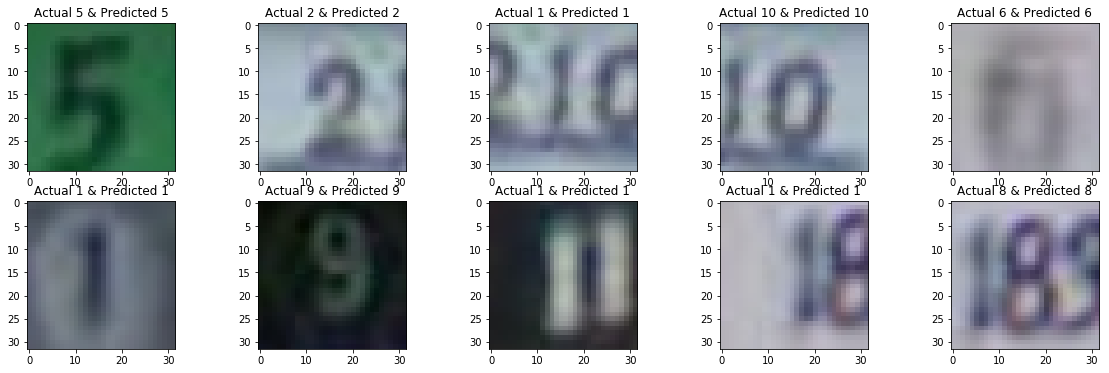

In [559]:
## Visualize the Image with Actual Label and Predicted Label using imshow function from Matplotlib
y = test_data['y'][:,0]

fig = plt.figure(figsize=(20,6))
axes = fig.subplots(nrows=2, ncols=5)

axes[0,0].set_title('Actual {} & Predicted {}'.format(y[0],Predicted_class_label[0]))  ## Label 
axes[0,0].imshow(X_test[0]) ## Image

axes[0,1].set_title('Actual {} & Predicted {}'.format(y[1],Predicted_class_label[1]))
axes[0,1].imshow(X_test[1])

axes[0,2].set_title('Actual {} & Predicted {}'.format(y[2],Predicted_class_label[2]))
axes[0,2].imshow(X_test[2])

axes[0,3].set_title('Actual {} & Predicted {}'.format(y[3],Predicted_class_label[3]))
axes[0,3].imshow(X_test[3])

axes[0,4].set_title('Actual {} & Predicted {}'.format(y[4],Predicted_class_label[4]))
axes[0,4].imshow(X_test[4])

axes[1,0].set_title('Actual {} & Predicted {}'.format(y[5],Predicted_class_label[5]))
axes[1,0].imshow(X_test[5])

axes[1,1].set_title('Actual {} & Predicted {}'.format(y[6],Predicted_class_label[6]))
axes[1,1].imshow(X_test[6])

axes[1,2].set_title('Actual {} & Predicted {}'.format(y[7],Predicted_class_label[7]))
axes[1,2].imshow(X_test[7])

axes[1,3].set_title('Actual {} & Predicted {}'.format(y[8],Predicted_class_label[8]))
axes[1,3].imshow(X_test[8])

axes[1,4].set_title('Actual {} & Predicted {}'.format(y[9],Predicted_class_label[9]))
axes[1,4].imshow(X_test[9])
plt.show()

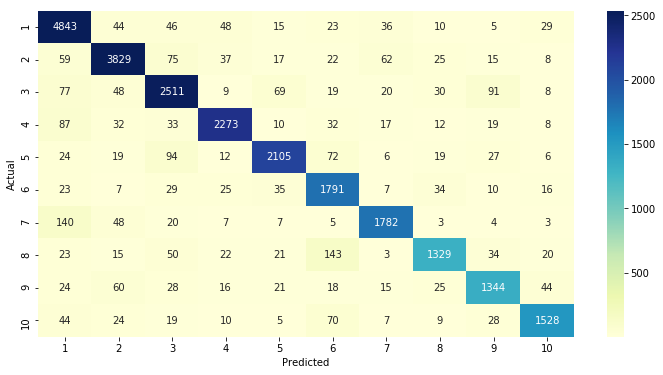

In [613]:
## Visualize the confusion matrix so that we can identify which class was misclassified in which classes minimum or maximum times

plt.figure(figsize = (12,6))
sns.heatmap(pd.crosstab(y,Predicted_class_label,rownames=['Actual'],colnames=['Predicted']), annot=True,  fmt="d",cmap="YlGnBu",robust =True)
plt.show()

## As you see 7 number misclassified in 1, 8 in 6, 3 in 9 &5 etc.